In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

df = pd.read_csv("./data/sample_trades.csv")
print(df.head())


         date ticker action  quantity   price
0  2023-01-10   AAPL    buy        10  145.30
1  2023-02-15   TSLA    buy         5  196.75
2  2023-03-01   AAPL   sell         5  155.00
3  2023-04-22   MSFT    buy         8  280.20
4  2023-05-12   AAPL    buy         2  160.50


In [3]:


df["quantity"] = df.apply(
    lambda row: -row["quantity"] if row["action"] == "sell" else row["quantity"], axis=1
)

In [4]:
df =df.drop(columns=["action"])

In [6]:
df['signed_value'] = df["quantity"] * df["price"]
df.head()

,date,ticker,quantity,price,signed_value
0,2023-01-10,AAPL,10,145.30,1453.00
1,2023-02-15,TSLA,5,196.75,983.75
2,2023-03-01,AAPL,-5,155.00,-775.00
3,2023-04-22,MSFT,8,280.20,2241.60
4,2023-05-12,AAPL,2,160.50,321.00


In [7]:
tickers = df["ticker"].unique().tolist()
holdings = pd.DataFrame({
    "Tickier" : df["ticker"],
    "Quantity" : df["quantity"],
    "Cost" : df["signed_value"]
}).groupby("Tickier").sum().reset_index()

holdings.head()



,Tickier,Quantity,Cost
0,AAPL,7,999.00
1,MSFT,8,2241.60
2,TSLA,5,983.75


In [28]:
df["date"] = pd.to_datetime(df["date"])
data = yf.download(tickers,start=df["date"].min(),end=pd.Timestamp.today().normalize())


[*********************100%***********************]  3 of 3 completed


In [12]:
data.tail()

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2025-04-04  188.380005  359.839996  239.429993  199.880005  374.589996   
2025-04-07  181.460007  357.859985  233.289993  194.149994  371.000000   
2025-04-08  172.419998  354.559998  221.860001  190.339996  373.649994   
2025-04-09  198.850006  390.489990  272.200012  200.610001  393.230011   
2025-04-10  190.419998  381.350006  252.399994  194.779999  383.899994   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2025-04-04  261.000000  187.339996  359.480011  236.000000  193.889999   
2025-04-07  252.000000  174.619995  344.790009  214.250000  177.199997   
2025-04-08  250.440002  169.210007  350.250000  217.800003  186.699997   
2025-04-09  274.690002  171.889999  353.100006  223.880005  171.949997   
2025-04-10  262.489990  183.000000  367.799988  239.330002  189.070007   

Price                                  Volume                           
Ticker            MSFT        TSLA       AAPL        MSFT         TSLA  
Date                                                                    
2025-04-04  364.130005  255.380005  125910900  49209900.0  181229400.0  
2025-04-07  350.880005  223.779999  160466300  50425000.0  183453800.0  
2025-04-08  368.260010  245.000000  120859500  35868900.0  171603500.0  
2025-04-09  353.540009  224.690002  184395900  50199700.0  219433400.0  
2025-04-10  382.059998  260.000000  121685000  37944100.0  180875500.0

In [13]:
latest_prices = data["Close"].iloc[-1]
holdings["Current Price"] = holdings["Tickier"].map(latest_prices)

holdings.head()


,Tickier,Quantity,Cost,Current Price
0,AAPL,7,999.00,190.419998
1,MSFT,8,2241.60,381.350006
2,TSLA,5,983.75,252.399994


In [15]:
holdings["Current Value"] = holdings["Current Price"]*holdings["Quantity"]

In [148]:
holdings.head()

,Tickier,Quantity,Cost,Current Price,Current Value
0,AAPL,7,999.00,172.419998,1206.939987
1,MSFT,8,2241.60,354.559998,2836.479980
2,TSLA,5,983.75,221.860001,1109.300003


In [16]:
df.head()

,date,ticker,quantity,price,signed_value
0,2023-01-10,AAPL,10,145.30,1453.00
1,2023-02-15,TSLA,5,196.75,983.75
2,2023-03-01,AAPL,-5,155.00,-775.00
3,2023-04-22,MSFT,8,280.20,2241.60
4,2023-05-12,AAPL,2,160.50,321.00


In [17]:
holdings["Profit/Loss"] = holdings["Current Value"] - holdings["Cost"]


In [18]:
holdings.head()

,Tickier,Quantity,Cost,Current Price,Current Value,Profit/Loss
0,AAPL,7,999.00,190.419998,1332.939987,333.939987
1,MSFT,8,2241.60,381.350006,3050.800049,809.200049
2,TSLA,5,983.75,252.399994,1261.999969,278.249969


In [19]:
df["date"] = pd.to_datetime(df["date"])

In [20]:
history = df.pivot_table(index="date",columns="ticker",values="quantity",aggfunc="sum")

In [21]:
all_days = pd.date_range(start=history.index.min(),end=pd.Timestamp.today().normalize())

history = history.reindex(all_days).fillna(0).cumsum()

In [22]:
history

ticker,AAPL,MSFT,TSLA
2023-01-10,10.0,0.0,0.0
2023-01-11,10.0,0.0,0.0
2023-01-12,10.0,0.0,0.0
2023-01-13,10.0,0.0,0.0
2023-01-14,10.0,0.0,0.0
...,...,...,...
2025-04-07,7.0,8.0,5.0
2025-04-08,7.0,8.0,5.0
2025-04-09,7.0,8.0,5.0
2025-04-10,7.0,8.0,5.0


In [51]:
daily_value = data["Close"]*history

In [52]:
daily_value = daily_value.fillna(method="ffill")

/var/folders/01/63vbx23n4j1f9ykpncsfr4mm0000gn/T/ipykernel_72262/1667764174.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_value = daily_value.fillna(method="ffill")


In [53]:
daily_value["Total"] = daily_value.sum(axis=1)

In [54]:
daily_value

Ticker,AAPL,MSFT,TSLA,Total
2023-01-10,1292.274628,0.000000,0.000000,1292.274628
2023-01-11,1319.557343,0.000000,0.000000,1319.557343
2023-01-12,1318.766632,0.000000,0.000000,1318.766632
2023-01-13,1332.111816,0.000000,0.000000,1332.111816
2023-01-14,1332.111816,0.000000,0.000000,1332.111816
...,...,...,...,...
2025-04-07,1270.220047,2862.879883,1166.449966,5299.549896
2025-04-08,1206.939987,2836.479980,1109.300003,5152.719971
2025-04-09,1391.950043,3123.919922,1361.000061,5876.870026
2025-04-10,1332.939987,3050.800049,1261.999969,5645.740005


<Axes: >

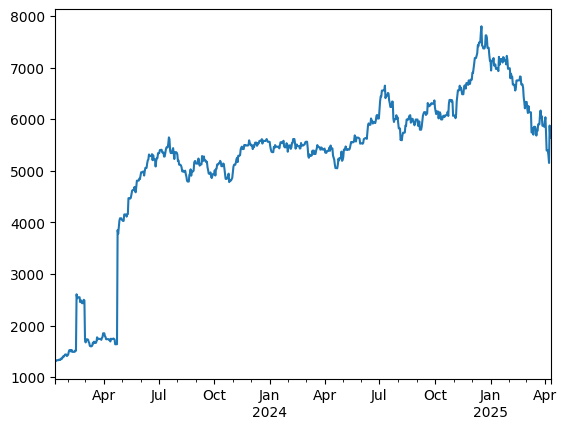

In [55]:
daily_value["Total"].plot()